#### Problem Statement:

### **Predicting High-Profit Sales Transactions Using Machine Learning**

---

#### Objective 
***
The goal of this project is to develop a machine learning model that can predict whether a sales transaction will yield a high profit (defined as a profit greater than $10,000). This predictive model will help the business prioritize and strategize its sales efforts to maximize profitability.

#### Data Description
***
The dataset contains 500,000 sales records with the following attributes:

- Region: The geographical region where the sale was made.
- Country: The country where the sale was made.
- Item Type: The type of item sold (e.g., Fruits, Clothes, Meat, etc.).
- Sales Channel: The sales channel used (Online or Offline).
- Order Priority: The priority of the order (High, Medium, Low, Critical).
- Order Date: The date when the order was placed.
- Order ID: A unique identifier for the order.
- Ship Date: The date when the order was shipped.
- Units Sold: The number of units sold.
- Unit Price: The price per unit.
- Unit Cost: The cost per unit.
- Total Revenue: The total revenue from the sale.
- Total Cost: The total cost of the sale.
- Total Profit: The total profit from the sale

---
#### **Load libraries And Dataset**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Loading the dataset
data = pd.read_csv("500000 Sales Records.csv")
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,5/17/2017,880811536,7/2/2017,562,109.28,35.84,61415.36,20142.08,41273.28
4,Europe,Slovakia,Beverages,Offline,L,10/26/2016,174590194,12/4/2016,3973,47.45,31.79,188518.85,126301.67,62217.18


---
#### **Data Exploration and Analysis**

In [7]:
data.shape

(500000, 14)

In [8]:
# check the datatypes of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Region          500000 non-null  object 
 1   Country         500000 non-null  object 
 2   Item Type       500000 non-null  object 
 3   Sales Channel   500000 non-null  object 
 4   Order Priority  500000 non-null  object 
 5   Order Date      500000 non-null  object 
 6   Order ID        500000 non-null  int64  
 7   Ship Date       500000 non-null  object 
 8   Units Sold      500000 non-null  int64  
 9   Unit Price      500000 non-null  float64
 10  Unit Cost       500000 non-null  float64
 11  Total Revenue   500000 non-null  float64
 12  Total Cost      500000 non-null  float64
 13  Total Profit    500000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 53.4+ MB


In [9]:
# check for unique values
data.nunique()

Region                 7
Country              185
Item Type             12
Sales Channel          2
Order Priority         4
Order Date          2766
Order ID          500000
Ship Date           2816
Units Sold         10000
Unit Price            12
Unit Cost             12
Total Revenue     118520
Total Cost        118360
Total Profit      118404
dtype: int64

In [10]:
# Find the percentage of missing values in each column
(data.isnull().sum()/data.shape[0] * 100)

Region            0.0
Country           0.0
Item Type         0.0
Sales Channel     0.0
Order Priority    0.0
Order Date        0.0
Order ID          0.0
Ship Date         0.0
Units Sold        0.0
Unit Price        0.0
Unit Cost         0.0
Total Revenue     0.0
Total Cost        0.0
Total Profit      0.0
dtype: float64

In [11]:
# Summary stats for numerical column
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Order ID,500000.0,5.501319e+08,2.599605e+08,1.000029e+08,3.251814e+08,5.491843e+08,7.756291e+08,9.999995e+08
Units Sold,500000.0,4.999136e+03,2.884024e+03,1.000000e+00,2.502000e+03,4.999000e+03,7.497000e+03,1.000000e+04
Unit Price,500000.0,2.660367e+02,2.169376e+02,9.330000e+00,8.173000e+01,1.540600e+02,4.218900e+02,6.682700e+02
Unit Cost,500000.0,1.875286e+02,1.756240e+02,6.920000e+00,5.667000e+01,9.744000e+01,2.633300e+02,5.249600e+02
Total Revenue,500000.0,1.330096e+06,1.468090e+06,9.330000e+00,2.783059e+05,7.862426e+05,1.824236e+06,6.682700e+06
Total Cost,500000.0,9.376163e+05,1.148684e+06,6.920000e+00,1.620597e+05,4.677120e+05,1.198736e+06,5.249600e+06
Total Profit,500000.0,3.924800e+05,3.787517e+05,2.410000e+00,9.538506e+04,2.817492e+05,5.653923e+05,1.738700e+06


In [12]:
# List of the categorical columns
categorical_columns = ["Region", "Country", "Item Type", "Sales Channel", "Order Priority"]

# Number of unique observations in each category
for column in categorical_columns:
    print(f"\nAnalysis of '{column}' column:")
    print("-" * 30)
    
    # Unique values
    unique_values = data[column].unique()
    print(f"Unique values ({len(unique_values)}): {unique_values[:5]}{'...' if len(unique_values) > 5 else ''}")
    
    # Value counts
    value_counts = data[column].value_counts()
    print("\nValue counts:")
    print(value_counts.head(10))  # Display top 10 for brevity
    
    # Missing values
    missing_values = data[column].isnull().sum()
    print(f"\nMissing values: {missing_values}")


Analysis of 'Region' column:
------------------------------
Unique values (7): ['Sub-Saharan Africa' 'Middle East and North Africa'
 'Australia and Oceania' 'Europe' 'Asia']...

Value counts:
Sub-Saharan Africa                   130422
Europe                               129286
Asia                                  72958
Middle East and North Africa          62020
Central America and the Caribbean     53964
Australia and Oceania                 40508
North America                         10842
Name: Region, dtype: int64

Missing values: 0

Analysis of 'Country' column:
------------------------------
Unique values (185): ['South Africa' 'Morocco' 'Papua New Guinea' 'Djibouti' 'Slovakia']...

Value counts:
Cape Verde     2840
Liberia        2805
Guinea         2805
Singapore      2804
New Zealand    2797
Malta          2791
Namibia        2789
Panama         2787
Algeria        2780
Lesotho        2778
Name: Country, dtype: int64

Missing values: 0

Analysis of 'Item Type' column:
----

In [13]:
# Standardize date formats
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,2012-07-27,443368995,2012-07-28,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Middle East and North Africa,Morocco,Clothes,Online,M,2013-09-14,667593514,2013-10-19,4611,109.28,35.84,503890.08,165258.24,338631.84
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,2015-05-15,940995585,2015-06-04,360,421.89,364.69,151880.40,131288.40,20592.00
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,2017-05-17,880811536,2017-07-02,562,109.28,35.84,61415.36,20142.08,41273.28
4,Europe,Slovakia,Beverages,Offline,L,2016-10-26,174590194,2016-12-04,3973,47.45,31.79,188518.85,126301.67,62217.18


---
#### **Data Processing**

##### Create columns for better insights

In [14]:
# Calculate the number of days between the order date and ship date
# which could give insights into how shipping time might affect profit
data['Shipping Time (Days)'] = (data['Ship Date'] - data['Order Date']).dt.days
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Shipping Time (Days)
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,2012-07-27,443368995,2012-07-28,1593,9.33,6.92,14862.69,11023.56,3839.13,1
1,Middle East and North Africa,Morocco,Clothes,Online,M,2013-09-14,667593514,2013-10-19,4611,109.28,35.84,503890.08,165258.24,338631.84,35
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,2015-05-15,940995585,2015-06-04,360,421.89,364.69,151880.40,131288.40,20592.00,20
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,2017-05-17,880811536,2017-07-02,562,109.28,35.84,61415.36,20142.08,41273.28,46
4,Europe,Slovakia,Beverages,Offline,L,2016-10-26,174590194,2016-12-04,3973,47.45,31.79,188518.85,126301.67,62217.18,39


In [15]:
# Extract the month from the order date, which could help identify seasonal trends in sales
data['Order Month'] = data['Order Date'].dt.month

# Extract the year from the order date to analyze year-over-year trends
data['Order Year'] = data['Order Date'].dt.year

In [16]:
# dropping columns that are not required for the analysis
data = data.drop(columns=['Order Date', 'Ship Date'])

In [17]:
# Calculate the profit margin as a percentage of the total revenue which gives a clearer picture of profitability
data['Profit Margin (%)'] = (data['Total Profit'] / data['Total Revenue']) * 100

# Calculate revenue per unit sold which help in understanding how different pricing strategies impact profitability
data['Revenue per Unit'] = data['Total Revenue'] / data['Units Sold']

# Calculate cost per unit, similar to revenue per unit, to understand the cost structure better
data['Cost per Unit'] = data['Total Cost'] / data['Units Sold']

data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Shipping Time (Days),Order Month,Order Year,Profit Margin (%),Revenue per Unit,Cost per Unit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,443368995,1593,9.33,6.92,14862.69,11023.56,3839.13,1,7,2012,25.830654,9.33,6.92
1,Middle East and North Africa,Morocco,Clothes,Online,M,667593514,4611,109.28,35.84,503890.08,165258.24,338631.84,35,9,2013,67.203514,109.28,35.84
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,940995585,360,421.89,364.69,151880.40,131288.40,20592.00,20,5,2015,13.558036,421.89,364.69
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,880811536,562,109.28,35.84,61415.36,20142.08,41273.28,46,5,2017,67.203514,109.28,35.84
4,Europe,Slovakia,Beverages,Offline,L,174590194,3973,47.45,31.79,188518.85,126301.67,62217.18,39,10,2016,33.003161,47.45,31.79


In [18]:
# Verifying there are no missing values
data.isnull().sum()

Region                  0
Country                 0
Item Type               0
Sales Channel           0
Order Priority          0
Order ID                0
Units Sold              0
Unit Price              0
Unit Cost               0
Total Revenue           0
Total Cost              0
Total Profit            0
Shipping Time (Days)    0
Order Month             0
Order Year              0
Profit Margin (%)       0
Revenue per Unit        0
Cost per Unit           0
dtype: int64

---
#### **Data Analysis**

##### Univariate Analysis

Units Sold
Skew : -0.0


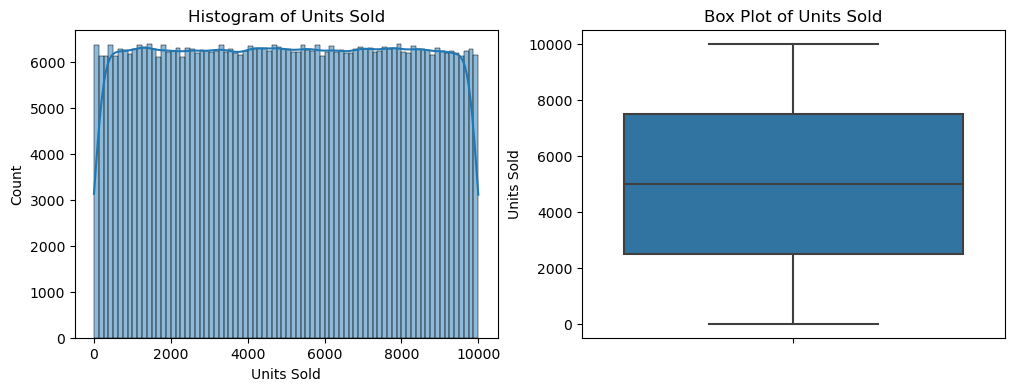

Unit Price
Skew : 0.74


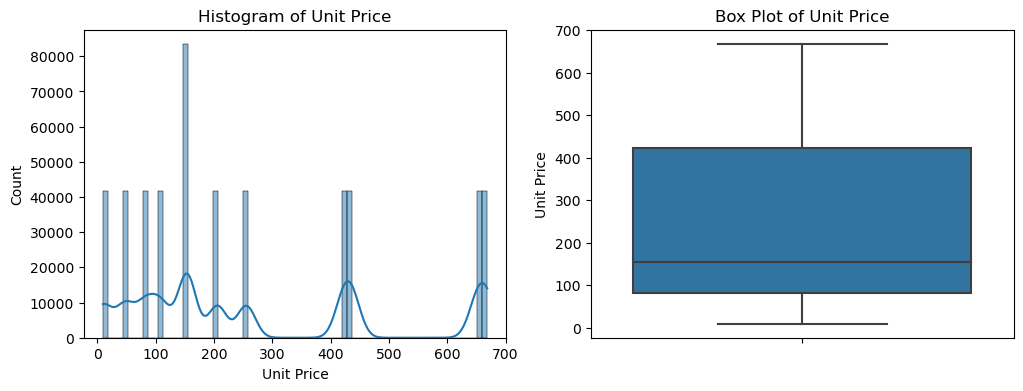

Unit Cost
Skew : 0.89


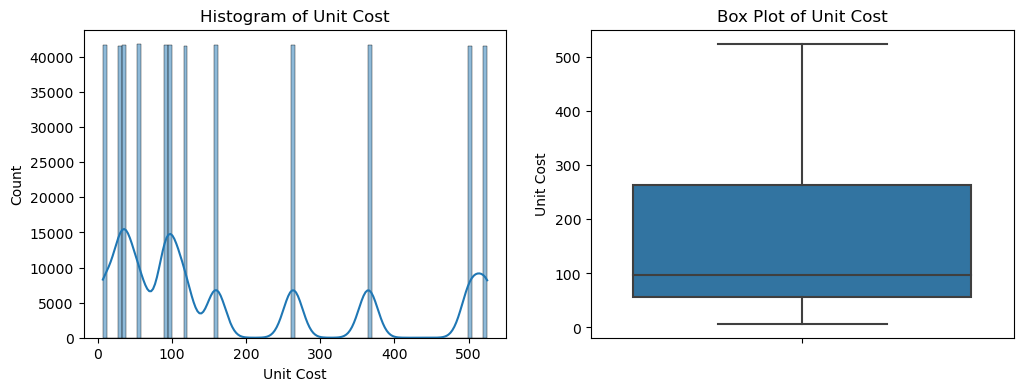

Total Revenue
Skew : 1.58


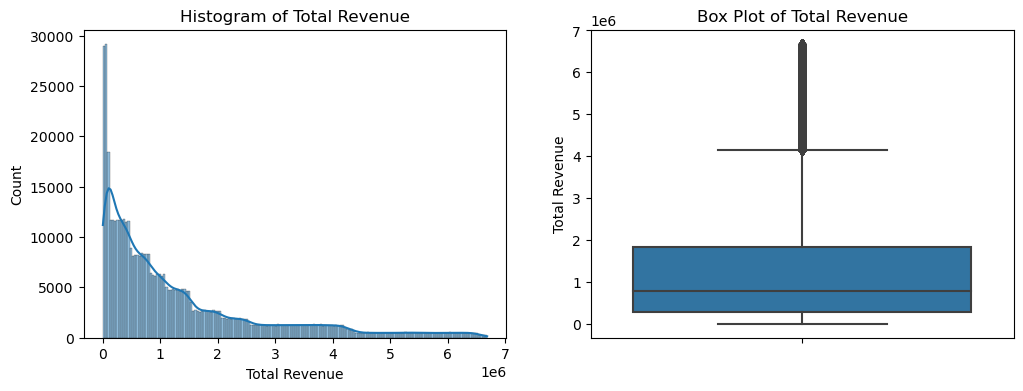

Total Cost
Skew : 1.75


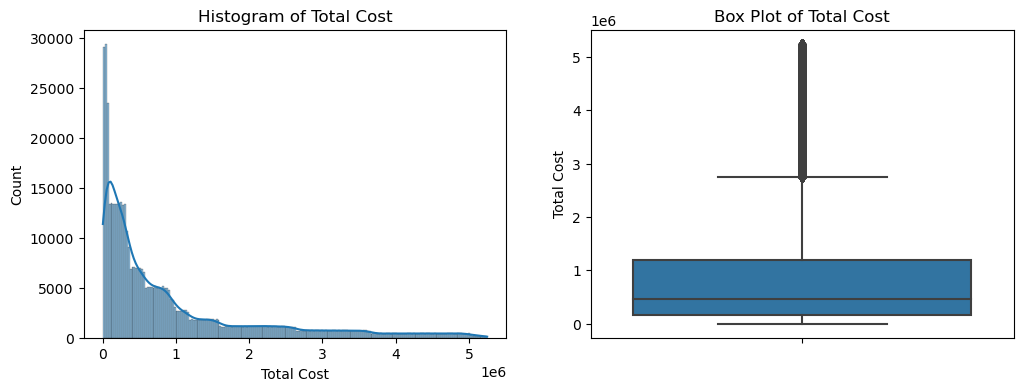

Total Profit
Skew : 1.29


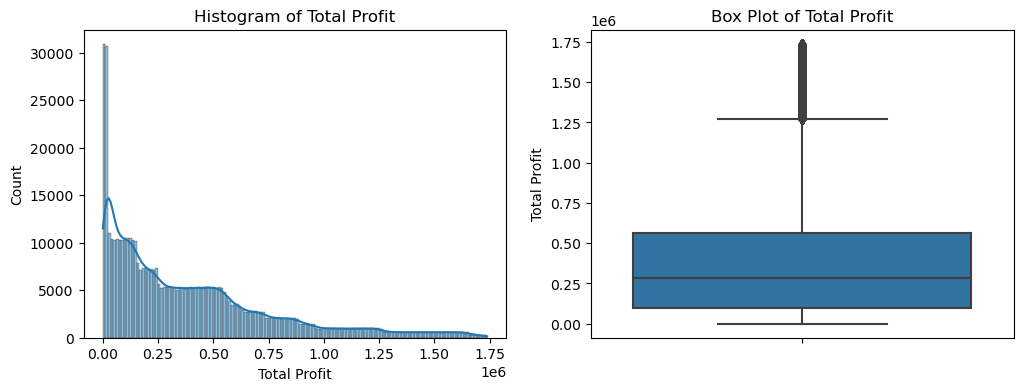

In [19]:
numerical_columns = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']

# Plotting histograms and box plots for each numerical column
for column in numerical_columns:
    print(column)
    print('Skew :',round(data[column].skew(),2))
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column}')

    plt.show()

In [20]:
# Calculate and print skewness for all numerical columns
skewness_values = round(data[numerical_columns].skew(),2)
print("Skewness of numerical columns:")
print(skewness_values)

Skewness of numerical columns:
Units Sold      -0.00
Unit Price       0.74
Unit Cost        0.89
Total Revenue    1.58
Total Cost       1.75
Total Profit     1.29
dtype: float64


In [21]:
# Define the columns you want to check for low numbers of extreme outliers
low_extreme_outliers = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']

# Loop through each column and print the 99.5th percentile
for col in low_extreme_outliers:
    print(f'The 99.5 percentile of {col} is: {round(data.quantile(q=0.995)[col], 2)} \n')

The 99.5 percentile of Units Sold is: 9950.0 

The 99.5 percentile of Unit Price is: 668.27 

The 99.5 percentile of Unit Cost is: 524.96 

The 99.5 percentile of Total Revenue is: 6401358.33 

The 99.5 percentile of Total Cost is: 4982181.56 

The 99.5 percentile of Total Profit is: 1645201.71 



In [27]:
# Define the 99.5 percentiles for each column
percentile_limits = {
    'Units Sold': 9950.0,
    'Unit Price': 668.27,
    'Unit Cost': 524.96,
    'Total Revenue': 6401358.33,
    'Total Cost': 4982181.56,
    'Total Profit': 1645201.71
}

# Function to filter rows based on the percentile limits
def drop_rows_outside_percentiles(data, percentile_limits):
    for column, limit in percentile_limits.items():
        data = data[data[column] <= limit]
    return data

# Apply the function to your DataFrame
filtered_data = drop_rows_outside_percentiles(data, percentile_limits)

# Display the filtered DataFrame
print(filtered_data)

                              Region           Country        Item Type  \
0                 Sub-Saharan Africa      South Africa           Fruits   
1       Middle East and North Africa           Morocco          Clothes   
2              Australia and Oceania  Papua New Guinea             Meat   
3                 Sub-Saharan Africa          Djibouti          Clothes   
4                             Europe          Slovakia        Beverages   
...                              ...               ...              ...   
499995                          Asia           Myanmar           Fruits   
499996         Australia and Oceania       New Zealand  Office Supplies   
499997                        Europe         Lithuania           Snacks   
499998                          Asia          Malaysia        Beverages   
499999                        Europe          Slovakia        Household   

       Sales Channel Order Priority   Order ID  Units Sold  Unit Price  \
0            Offline     

##### Bivariate Analysis

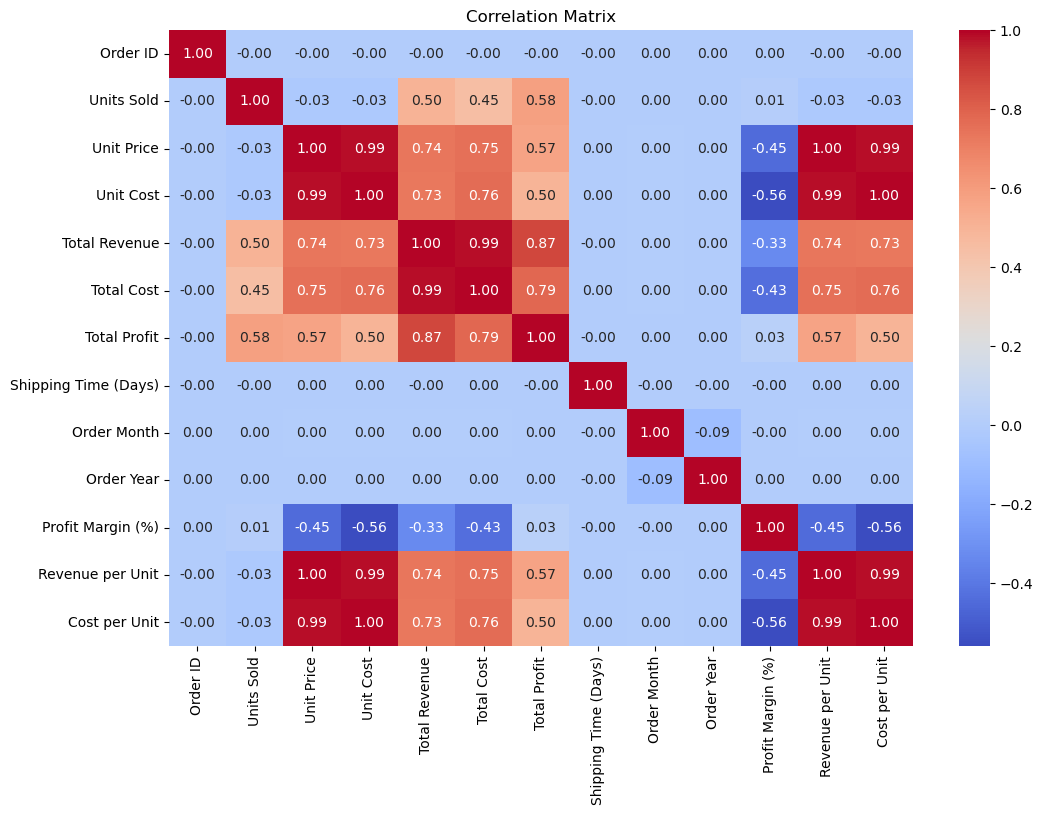

In [33]:
# Calculate the correlation matrix
correlation_matrix = filtered_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()